# An Overview of Covid-19 in Singapore and SEA

## Acknowledgements:
https://github.com/imdevskp/covid_19_jhu_data_web_scrap_and_cleaning

In [2]:
#importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
full_table = pd.read_csv('covid_19_clean_complete.csv',parse_dates=['Date'])

In [5]:
full_table['Country/Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Diamond Princess', 'Cuba', 'Cyprus',
       'Czechia', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary',
       'Iceland', 'India

### First we start off my removing ship based data from the set to keep only countries.

In [9]:
# Ship (removing ship data from set)
# ====

# ship rows
ship_rows = full_table['Province/State'].str.contains('Grand Princess') | full_table['Province/State'].str.contains('Diamond Princess') | full_table['Country/Region'].str.contains('Diamond Princess') | full_table['Country/Region'].str.contains('MS Zaandam')

In [10]:
ship = full_table[ship_rows]
ship.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
37,Grand Princess,Canada,37.6489,-122.6655,2020-01-22,0,0,0
88,NaN,Diamond Princess,0.0000,0.0000,2020-01-22,0,0,0
231,Diamond Princess,Canada,0.0000,0.0000,2020-01-22,0,0,0
251,NaN,MS Zaandam,0.0000,0.0000,2020-01-22,0,0,0
302,Grand Princess,Canada,37.6489,-122.6655,2020-01-23,0,0,0


In [17]:
full_table = full_table[~(ship_rows)]

In [18]:
full_table

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.000000,65.000000,2020-01-22,0,0,0
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0
5,NaN,Antigua and Barbuda,17.060800,-61.796400,2020-01-22,0,0,0
6,NaN,Argentina,-38.416100,-63.616700,2020-01-22,0,0,0
7,NaN,Armenia,40.069100,45.038200,2020-01-22,0,0,0
8,Australian Capital Territory,Australia,-35.473500,149.012400,2020-01-22,0,0,0
9,New South Wales,Australia,-33.868800,151.209300,2020-01-22,0,0,0


In [12]:
ship_latest = ship[ship['Date']==max(ship['Date'])]

In [13]:
#taking a look at ship data out of curiosity
ship_latest

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
32897,Grand Princess,Canada,37.6489,-122.6655,2020-05-25,13,0,0
32948,NaN,Diamond Princess,0.0000,0.0000,2020-05-25,712,13,651
33091,Diamond Princess,Canada,0.0000,0.0000,2020-05-25,1,1,0
33111,NaN,MS Zaandam,0.0000,0.0000,2020-05-25,9,2,0


In [21]:
ship_latest.style.background_gradient(cmap='Pastel1_r')

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
32897,Grand Princess,Canada,37.6489,-122.665,2020-05-25 00:00:00,13,0,0
32948,nan,Diamond Princess,0,0,2020-05-25 00:00:00,712,13,651
33091,Diamond Princess,Canada,0,0,2020-05-25 00:00:00,1,1,0
33111,nan,MS Zaandam,0,0,2020-05-25 00:00:00,9,2,0


## Singapore


In [22]:
sg = full_table[full_table['Country/Region'] == 'Singapore']

In [23]:
sg.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
196,NaN,Singapore,1.2833,103.8333,2020-01-22,0,0,0
461,NaN,Singapore,1.2833,103.8333,2020-01-23,1,0,0
726,NaN,Singapore,1.2833,103.8333,2020-01-24,3,0,0
991,NaN,Singapore,1.2833,103.8333,2020-01-25,3,0,0
1256,NaN,Singapore,1.2833,103.8333,2020-01-26,4,0,0


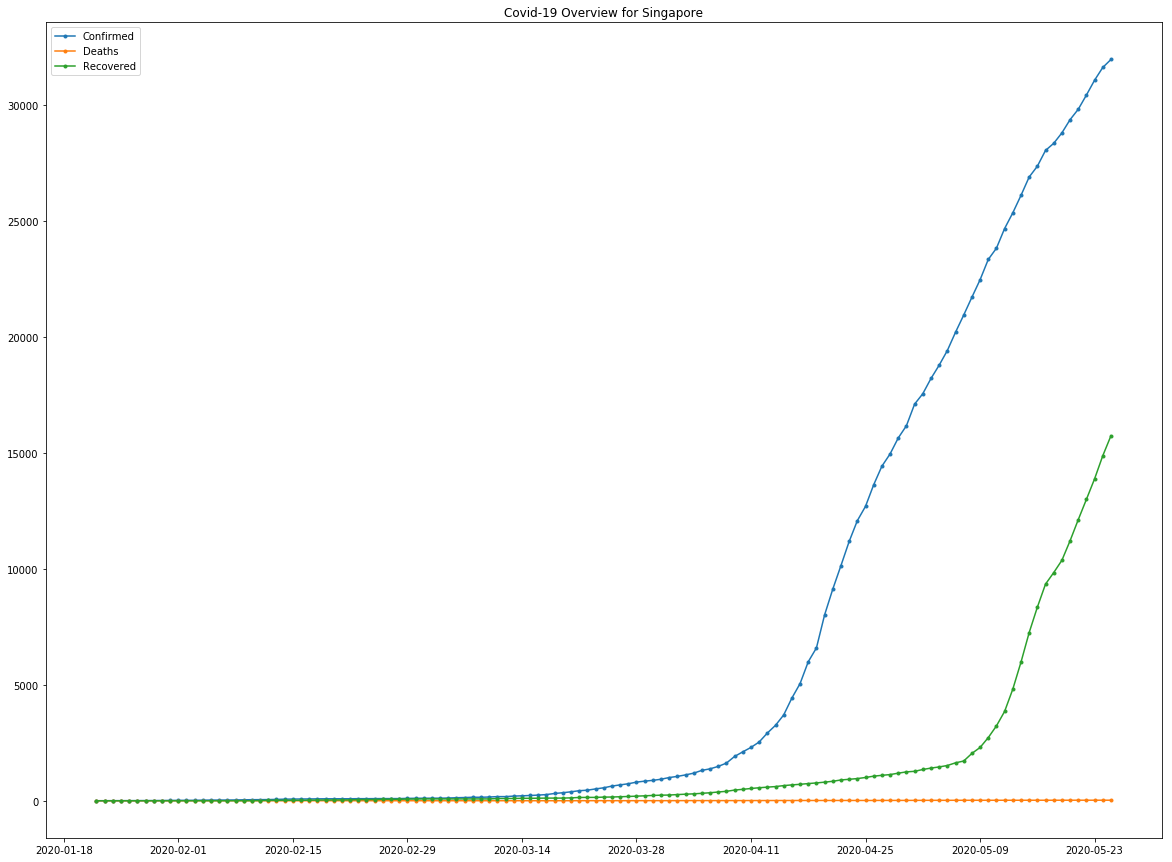

In [24]:
plt.figure(figsize=(20,15))

plt.title('Covid-19 Overview for Singapore')

plt.plot(sg.Date, sg.Confirmed, '.-')
plt.plot(sg.Date, sg.Deaths, '.-')
plt.plot(sg.Date, sg.Recovered, '.-')


plt.legend()

plt.show()

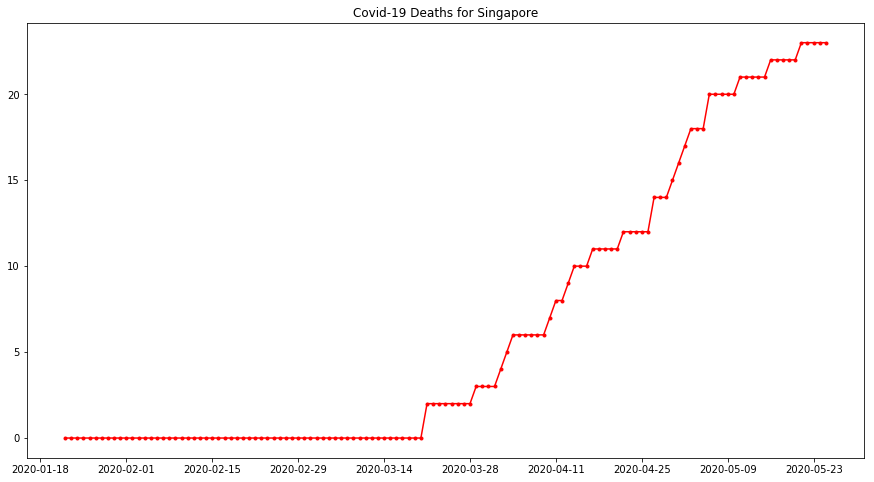

In [25]:
plt.figure(figsize=(15,8))

plt.title('Covid-19 Deaths for Singapore')
plt.plot(sg.Date, sg.Deaths, 'r.-')

plt.show()

In [26]:
sg = sg.reset_index()

In [27]:
sg.head()

,index,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,196,NaN,Singapore,1.2833,103.8333,2020-01-22,0,0,0
1,461,NaN,Singapore,1.2833,103.8333,2020-01-23,1,0,0
2,726,NaN,Singapore,1.2833,103.8333,2020-01-24,3,0,0
3,991,NaN,Singapore,1.2833,103.8333,2020-01-25,3,0,0
4,1256,NaN,Singapore,1.2833,103.8333,2020-01-26,4,0,0


### The dataset is cumulative, meaning it doesn't show the increase in numbers per day, which is something of interest to us.

In [28]:
sg['Change in number of cases'] = sg['Confirmed'].diff()

In [29]:
# sg.head()
sg['Change in number of deaths'] = sg['Deaths'].diff()
sg['Change in number of recovered'] = sg['Recovered'].diff()

We are also interested in the maximum count which is highlighted in yellow below.

In [30]:
def highlight_max(s):
#     '''
#     highlight the maximum in a Series yellow.
#     '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

def color_negative_red(val):
#     """
#     Takes a scalar and returns a string with
#     the css property `'color: red'` for negative
#     strings, black otherwise.
#     """
    color = 'red' if val < 0 else 'black'
    return 'color: %s' % color

sg.style.apply(color_negative_red, subset = ['Change in number of deaths', 'Change in number of recovered', 'Change in number of cases'])
sg.style.apply(highlight_max, subset = ['Change in number of deaths', 'Change in number of recovered', 'Change in number of cases'])

,index,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Change in number of cases,Change in number of deaths,Change in number of recovered
0,196,nan,Singapore,1.2833,103.833,2020-01-22 00:00:00,0,0,0,nan,nan,nan
1,461,nan,Singapore,1.2833,103.833,2020-01-23 00:00:00,1,0,0,1,0,0
2,726,nan,Singapore,1.2833,103.833,2020-01-24 00:00:00,3,0,0,2,0,0
3,991,nan,Singapore,1.2833,103.833,2020-01-25 00:00:00,3,0,0,0,0,0
4,1256,nan,Singapore,1.2833,103.833,2020-01-26 00:00:00,4,0,0,1,0,0
5,1521,nan,Singapore,1.2833,103.833,2020-01-27 00:00:00,5,0,0,1,0,0
6,1786,nan,Singapore,1.2833,103.833,2020-01-28 00:00:00,7,0,0,2,0,0
7,2051,nan,Singapore,1.2833,103.833,2020-01-29 00:00:00,7,0,0,0,0,0
8,2316,nan,Singapore,1.2833,103.833,2020-01-30 00:00:00,10,0,0,3,0,0
9,2581,nan,Singapore,1.2833,103.833,2020-01-31 00:00:00,13,0,0,3,0,0


In [31]:
sg.to_csv('SG-Covid19.csv',index = False)

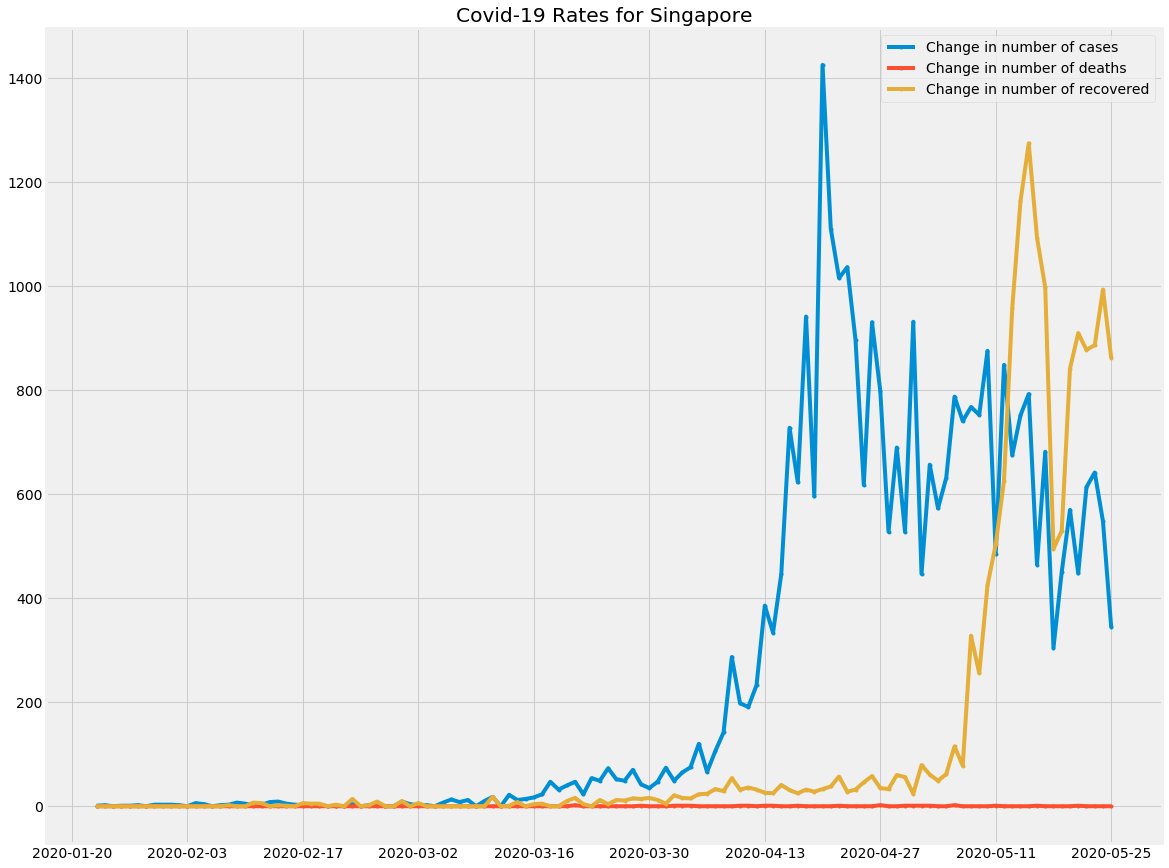

In [32]:
plt.figure(figsize=(20,15))
plt.style.use('fivethirtyeight')
plt.title('Covid-19 Rates for Singapore')

plt.plot(sg.Date, sg['Change in number of cases'], '.-')
plt.plot(sg.Date, sg['Change in number of deaths'], '.-')
plt.plot(sg.Date, sg['Change in number of recovered'], '.-')


plt.legend()

plt.show()

# SEA

In [33]:
full_table = pd.read_csv('covid_19_clean_complete.csv',parse_dates=['Date'])
full_table['Date'] = pd.to_datetime(full_table['Date'])

In [34]:
SEA_rows = full_table['Country/Region'].str.contains('Brunei') | full_table['Country/Region'].str.contains('Cambodia') | full_table['Country/Region'].str.contains('Timor-Leste') | full_table['Country/Region'].str.contains('Indonesia') | full_table['Country/Region'].str.contains('Laos') | full_table['Country/Region'].str.contains('Malaysia') | full_table['Country/Region'].str.contains('Burma') | full_table['Country/Region'].str.contains('Philippines') | full_table['Country/Region'].str.contains('Singapore') | full_table['Country/Region'].str.contains('Thailand') | full_table['Country/Region'].str.contains('Vietnam')

In [35]:
SEA = full_table[SEA_rows]

In [36]:
SEA.to_csv('SEA-covid19.csv', index = False)

In [37]:
SEA.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
29,NaN,Brunei,4.5353,114.7277,2020-01-22,0,0,0
33,NaN,Cambodia,11.5500,104.9167,2020-01-22,0,0,0
132,NaN,Indonesia,-0.7893,113.9213,2020-01-22,0,0,0
153,NaN,Malaysia,2.5000,112.5000,2020-01-22,0,0,0
182,NaN,Philippines,13.0000,122.0000,2020-01-22,0,0,0


In [38]:
SEA['Country/Region'].unique()

array(['Brunei', 'Cambodia', 'Indonesia', 'Malaysia', 'Philippines',
       'Singapore', 'Thailand', 'Vietnam', 'Timor-Leste', 'Laos', 'Burma'],
      dtype=object)

In [39]:
def highlight_min(s):
#     '''
#     highlight the maximum in a Series yellow.
#     '''
    is_min = s == s.min()
    return ['background-color: red' if v else '' for v in is_min]

In [40]:
latest = SEA['Date'] == max(SEA['Date'])
SEA_latest = SEA[latest]
SEA_latest.style.apply(highlight_max, subset = ['Confirmed', 'Deaths', 'Recovered'])

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
32889,nan,Brunei,4.5353,114.728,2020-05-25 00:00:00,141,1,137
32893,nan,Cambodia,11.55,104.917,2020-05-25 00:00:00,124,0,122
32992,nan,Indonesia,-0.7893,113.921,2020-05-25 00:00:00,22750,1391,5642
33013,nan,Malaysia,2.5,112.5,2020-05-25 00:00:00,7417,115,5979
33042,nan,Philippines,13,122,2020-05-25 00:00:00,14319,873,3323
33056,nan,Singapore,1.2833,103.833,2020-05-25 00:00:00,31960,23,15738
33069,nan,Thailand,15,101,2020-05-25 00:00:00,3042,57,2928
33088,nan,Vietnam,16,108,2020-05-25 00:00:00,326,0,272
33096,nan,Timor-Leste,-8.87422,125.728,2020-05-25 00:00:00,24,0,0
33098,nan,Laos,19.8563,102.495,2020-05-25 00:00:00,19,0,0


In [41]:
SEA_latest.style.apply(highlight_min, subset = ['Confirmed', 'Deaths', 'Recovered'])

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
32889,nan,Brunei,4.5353,114.728,2020-05-25 00:00:00,141,1,137
32893,nan,Cambodia,11.55,104.917,2020-05-25 00:00:00,124,0,122
32992,nan,Indonesia,-0.7893,113.921,2020-05-25 00:00:00,22750,1391,5642
33013,nan,Malaysia,2.5,112.5,2020-05-25 00:00:00,7417,115,5979
33042,nan,Philippines,13,122,2020-05-25 00:00:00,14319,873,3323
33056,nan,Singapore,1.2833,103.833,2020-05-25 00:00:00,31960,23,15738
33069,nan,Thailand,15,101,2020-05-25 00:00:00,3042,57,2928
33088,nan,Vietnam,16,108,2020-05-25 00:00:00,326,0,272
33096,nan,Timor-Leste,-8.87422,125.728,2020-05-25 00:00:00,24,0,0
33098,nan,Laos,19.8563,102.495,2020-05-25 00:00:00,19,0,0


<function matplotlib.pyplot.show(*args, **kw)>

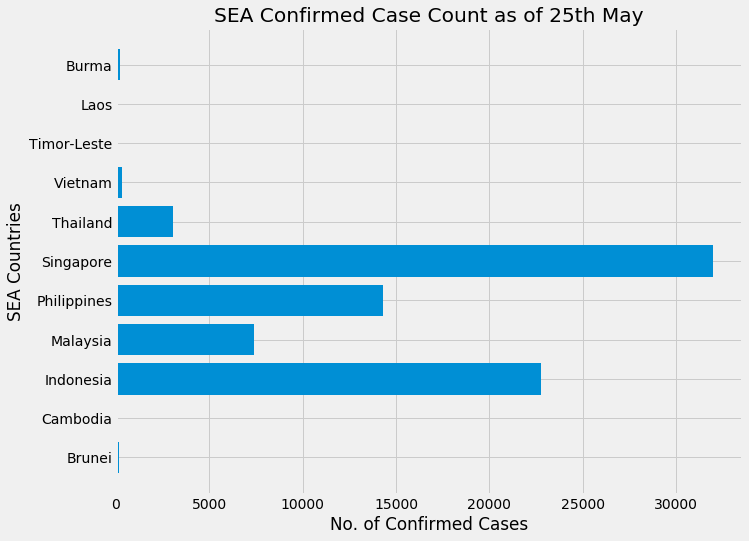

In [43]:
plt.figure(figsize=(10,8))
plt.style.use('fivethirtyeight')

y_indexes = np.arange(len(SEA_latest['Country/Region']))

plt.barh(y_indexes, SEA_latest['Confirmed'])


plt.yticks(y_indexes, SEA_latest['Country/Region'])
plt.xlabel('No. of Confirmed Cases')
plt.ylabel('SEA Countries')
plt.title('SEA Confirmed Case Count as of 25th May')

plt.show


In [44]:
SEA_latest

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
32889,NaN,Brunei,4.535300,114.727700,2020-05-25,141,1,137
32893,NaN,Cambodia,11.550000,104.916700,2020-05-25,124,0,122
32992,NaN,Indonesia,-0.789300,113.921300,2020-05-25,22750,1391,5642
33013,NaN,Malaysia,2.500000,112.500000,2020-05-25,7417,115,5979
33042,NaN,Philippines,13.000000,122.000000,2020-05-25,14319,873,3323
33056,NaN,Singapore,1.283300,103.833300,2020-05-25,31960,23,15738
33069,NaN,Thailand,15.000000,101.000000,2020-05-25,3042,57,2928
33088,NaN,Vietnam,16.000000,108.000000,2020-05-25,326,0,272
33096,NaN,Timor-Leste,-8.874217,125.727539,2020-05-25,24,0,0
33098,NaN,Laos,19.856270,102.495496,2020-05-25,19,0,0


In [45]:
SEA_latest['Country/Region'].unique()

array(['Brunei', 'Cambodia', 'Indonesia', 'Malaysia', 'Philippines',
       'Singapore', 'Thailand', 'Vietnam', 'Timor-Leste', 'Laos', 'Burma'],
      dtype=object)

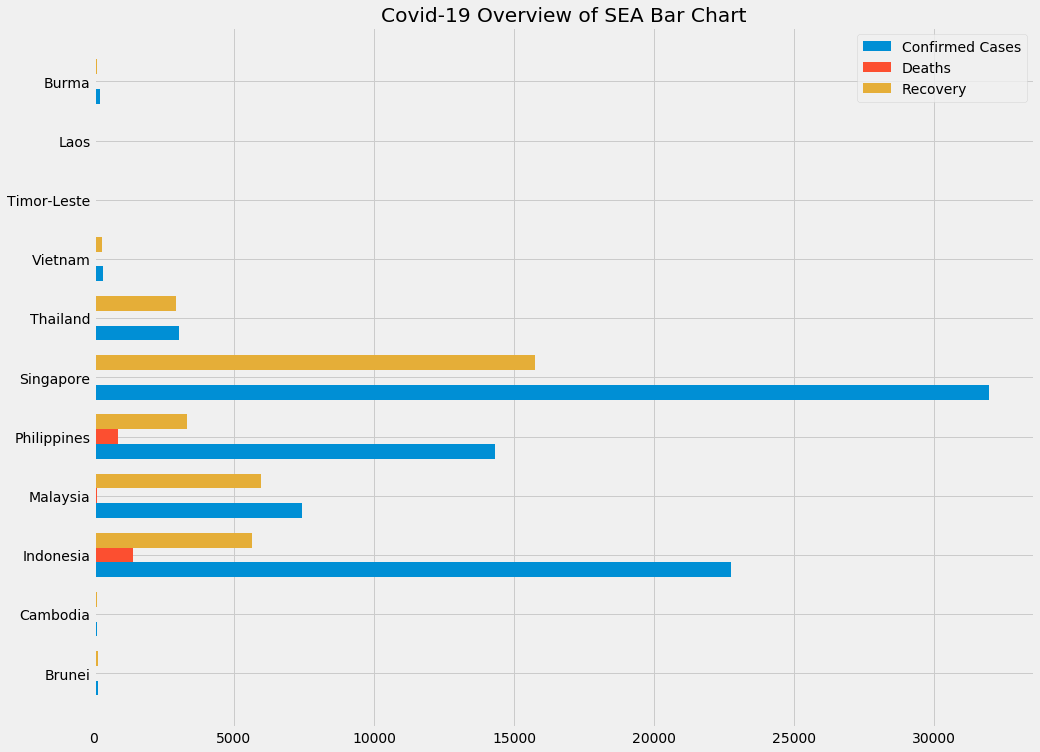

In [46]:
country = SEA_latest['Country/Region'].unique()
indx = np.arange(len(SEA_latest['Country/Region']))

Confirmed = list(SEA_latest['Confirmed'])
Deaths = list(SEA_latest['Deaths'])
Recovery = list(SEA_latest['Recovered'])

plt.rcParams['figure.figsize'] = (15,12)
barwidth = 0.25


fig, ax = plt.subplots()
plt.title('Covid-19 Overview of SEA Bar Chart')


BarConfirmed = ax.barh(indx - barwidth, Confirmed, barwidth, label = 'Confirmed Cases')
BarDeaths = ax.barh(indx, Deaths, barwidth, label = 'Deaths')
BarRecovery = ax.barh(indx + barwidth, Recovery, barwidth, label = 'Recovery')

ax.set_yticks(indx)
ax.set_yticklabels(country)

plt.legend()
plt.show()



In [138]:
# top5sea = full_table[full_table['Country/Region'].str.contains('Indonesia') | full_table['Country/Region'].str.contains('Malaysia') | full_table['Country/Region'].str.contains('Philippines') | full_table['Country/Region'].str.contains('Singapore') | full_table['Country/Region'].str.contains('Thailand')]
# top5sea.head()

In [139]:
# top5sea['Change in number of cases'] = top5sea['Confirmed'].diff()
# top5sea['Change in number of deaths'] = top5sea['Deaths'].diff()
# top5sea['Change in number of recovered'] = top5sea['Recovered'].diff()

# top5sea

In [61]:
TH = full_table[full_table['Country/Region'].str.contains('Thailand')]
# TH

In [62]:
SG = full_table[full_table['Country/Region'].str.contains('Singapore')]
# SG

In [63]:
PH = full_table[full_table['Country/Region'].str.contains('Philippines')]
# PH

In [64]:
INDO = full_table[full_table['Country/Region'].str.contains('Indonesia')]
# INDO

In [65]:
MY = full_table[full_table['Country/Region'].str.contains('Malaysia')]
# MY

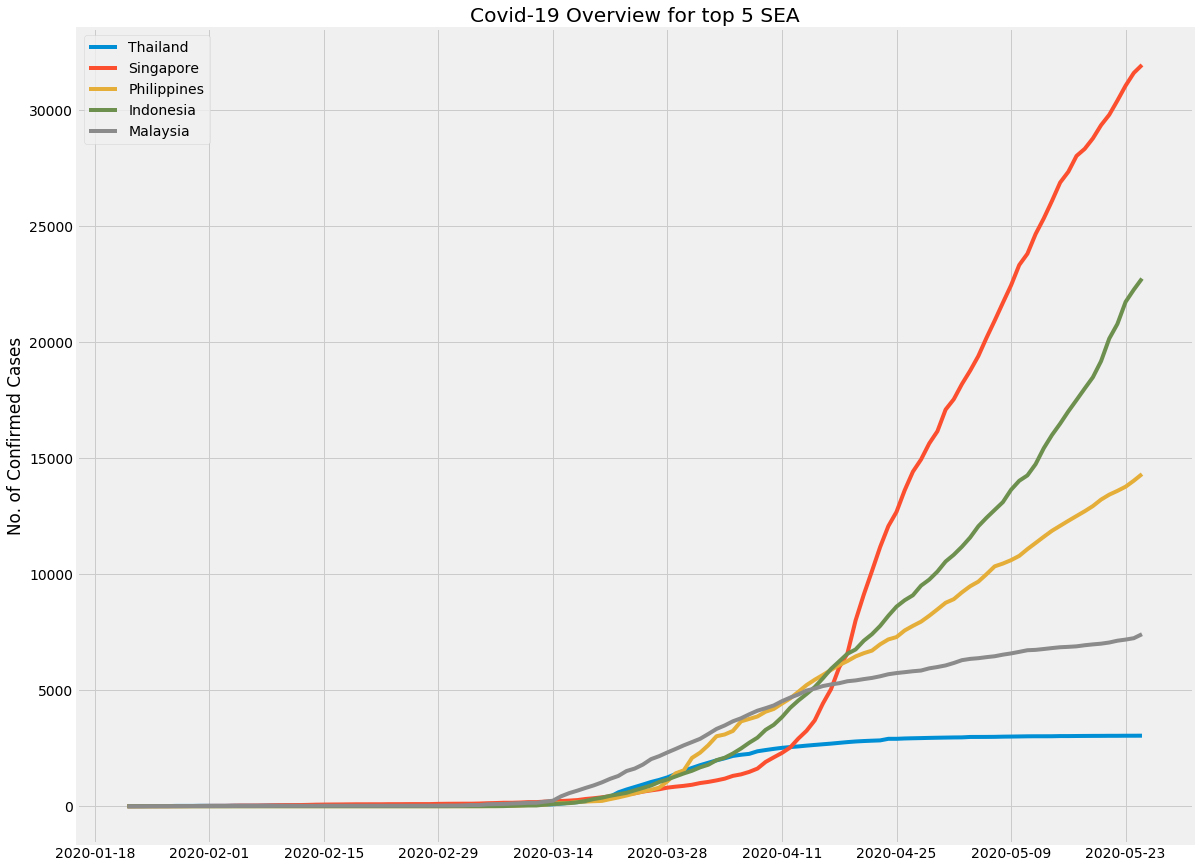

In [9]:
plt.figure(figsize=(20,15))
plt.style.use('fivethirtyeight')
plt.title('Covid-19 Overview for top 5 SEA')


plt.plot(TH.Date, TH['Confirmed'], label =  'Thailand')
plt.plot(SG.Date, SG['Confirmed'], label = 'Singapore')
plt.plot(PH.Date, PH['Confirmed'], label = 'Philippines')
plt.plot(INDO.Date, INDO['Confirmed'], label = 'Indonesia')
plt.plot(MY.Date, MY['Confirmed'], label = 'Malaysia')


plt.ylabel('No. of Confirmed Cases')
plt.legend()


plt.show()

Now I want to automate python to go through every top 5 SEA country and calculate the case count per day.

In [66]:
top5sea = [TH,SG,PH,INDO,MY]

In [73]:
for country in top5sea:
    country['Case Count per Day'] = country['Confirmed'].diff()

C:\Users\y4reg\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [74]:
SG.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Case Count per Day
196,NaN,Singapore,1.2833,103.8333,2020-01-22,0,0,0,NaN
461,NaN,Singapore,1.2833,103.8333,2020-01-23,1,0,0,1.0
726,NaN,Singapore,1.2833,103.8333,2020-01-24,3,0,0,2.0
991,NaN,Singapore,1.2833,103.8333,2020-01-25,3,0,0,0.0
1256,NaN,Singapore,1.2833,103.8333,2020-01-26,4,0,0,1.0


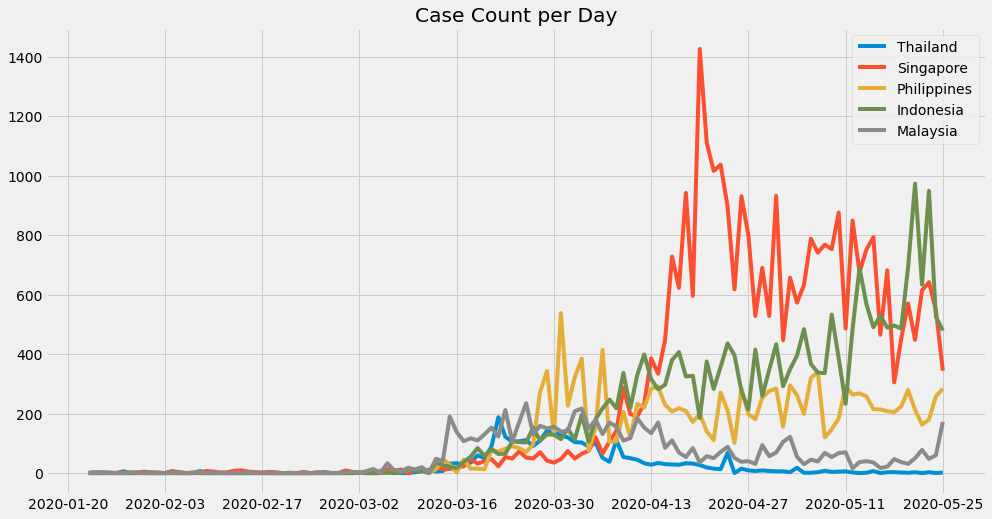

In [93]:
plt.figure(figsize=(15,8))
plt.style.use('fivethirtyeight')
plt.title('Case Count per Day')

for country in top5sea:
    plt.plot(country['Date'], country['Case Count per Day'], label = country.iloc[0]['Country/Region'])
    
plt.legend()
plt.show()

In [78]:
for country in top5sea:
    country['Death Count per Day'] = country['Deaths'].diff()

C:\Users\y4reg\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


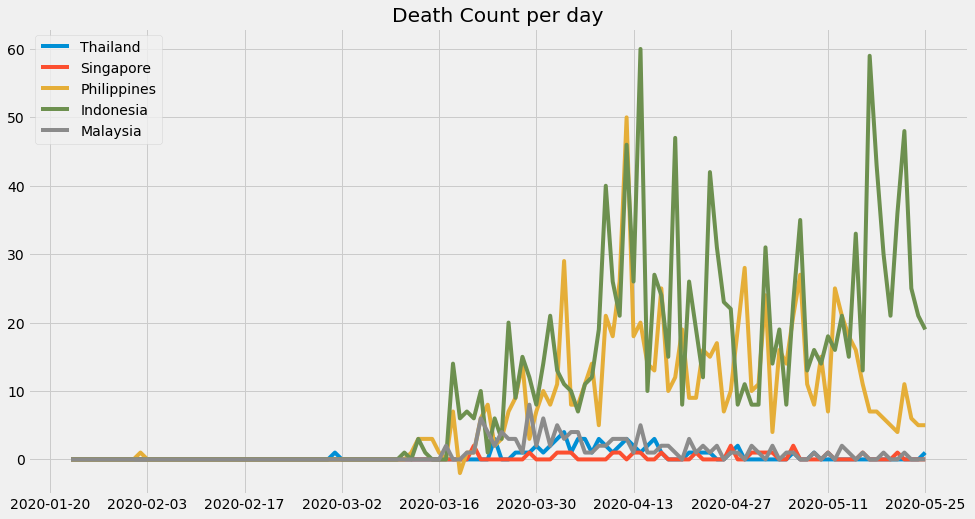

In [95]:
plt.figure(figsize=(15,8))
plt.style.use('fivethirtyeight')
plt.title('Death Count per day')

for country in top5sea:
    plt.plot(country['Date'], country['Death Count per Day'], label = country.iloc[0]['Country/Region'])
    
plt.legend()
plt.show()

In [81]:
for country in top5sea:
    country['Recovery Count per Day'] = country['Recovered'].diff()

C:\Users\y4reg\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


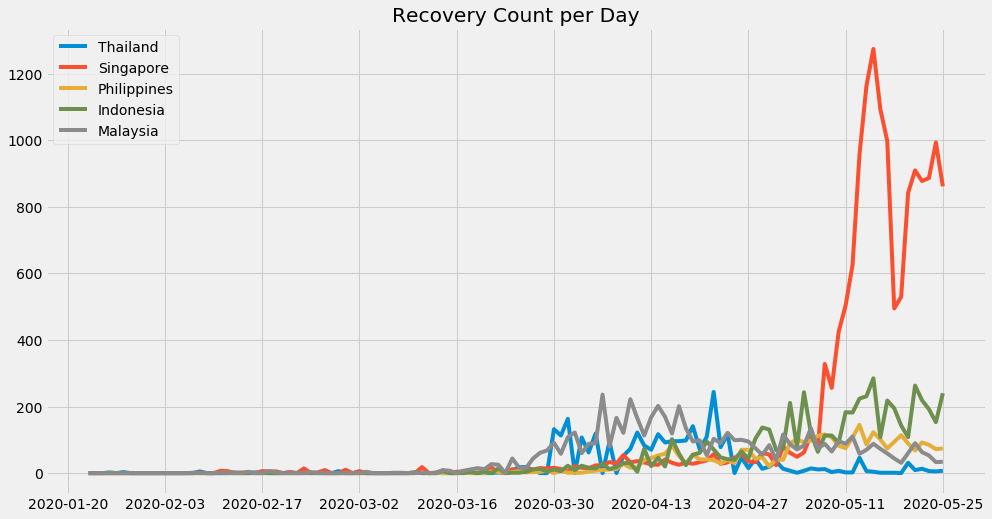

In [94]:
plt.figure(figsize=(15,8))
plt.style.use('fivethirtyeight')
plt.title('Recovery Count per Day')

for country in top5sea:
    plt.plot(country['Date'], country['Recovery Count per Day'], label = country.iloc[0]['Country/Region'])
    
plt.legend()
plt.show()

In [85]:
html_url = "https://en.wikipedia.org/wiki/List_of_countries_by_Human_Development_Index"
HDI_table = pd.read_html(html_url)

In [86]:
len(HDI_table)

16

In [87]:
df = pd.DataFrame(HDI_table[1])
df.head()

,0,1,2,3,4
0,Rank,Country or Territory,HDI,NaN,NaN
1,2018 data (2019 report)​[5],Change from previous year​[5],2018 data (2019 report)​[5],Average annual HDI growth (2010–2018)​[6],NaN
2,Very high human development,NaN,NaN,NaN,NaN
3,1,NaN,Norway,0.954,0.16
4,2,NaN,Switzerland,0.946,0.18


In [88]:
df_cols = ['Rank', 'Change in Rank', 'Country', 'HDI', 'Change in HDI']
df.columns = df_cols

In [89]:
df.head()

,Rank,Change in Rank,Country,HDI,Change in HDI
0,Rank,Country or Territory,HDI,NaN,NaN
1,2018 data (2019 report)​[5],Change from previous year​[5],2018 data (2019 report)​[5],Average annual HDI growth (2010–2018)​[6],NaN
2,Very high human development,NaN,NaN,NaN,NaN
3,1,NaN,Norway,0.954,0.16
4,2,NaN,Switzerland,0.946,0.18


In [98]:
df.drop(1, inplace = True)

In [99]:
df.head()

,Rank,Change in Rank,Country,HDI,Change in HDI
2,Very high human development,NaN,NaN,NaN,NaN
3,1,NaN,Norway,0.954,0.16
4,2,NaN,Switzerland,0.946,0.18
5,3,NaN,Ireland,0.942,0.71
6,4,NaN,Germany,0.939,0.25


In [130]:
df.fillna('')

,Rank,Change in Rank,Country,HDI,Change in HDI
2,Very high human development,,,,
3,1,,Norway,0.954,0.16
4,2,,Switzerland,0.946,0.18
5,3,,Ireland,0.942,0.71
6,4,,Germany,0.939,0.25
7,4,(2),Hong Kong,0.939,0.51
8,6,(1),Australia,0.938,0.17
9,6,(1),Iceland,0.938,0.64
10,8,(1),Sweden,0.937,0.42
11,9,,Singapore,0.935,0.35


In [100]:
df.dtypes

Rank              object
Change in Rank    object
Country           object
HDI               object
Change in HDI     object
dtype: object

In [101]:
df['Country'].unique()

array([nan, 'Norway', 'Switzerland', 'Ireland', 'Germany', 'Hong Kong',
       'Australia', 'Iceland', 'Sweden', 'Singapore', 'Netherlands',
       'Denmark', 'Finland', 'Canada', 'New Zealand', 'United Kingdom',
       'United States', 'Belgium', 'Liechtenstein', 'Japan', 'Austria',
       'Luxembourg', 'Israel', 'South Korea', 'Slovenia', 'Spain',
       'Czech Republic', 'France', 'Malta', 'Italy', 'Estonia', 'Cyprus',
       'Greece', 'Poland', 'Lithuania', 'United Arab Emirates', 'Andorra',
       'Saudi Arabia', 'Slovakia', 'Latvia', 'Portugal', 'Qatar', 'Chile',
       'Brunei', 'Hungary', 'Bahrain', 'Croatia', 'Oman', 'Argentina',
       'Russia', 'Belarus', 'Kazakhstan', 'Bulgaria', 'Montenegro',
       'Romania', 'Palau', 'Barbados', 'Kuwait', 'Uruguay', 'Turkey',
       'Bahamas', 'Malaysia', 'Seychelles', 'Serbia',
       'Trinidad and Tobago', 'Iran', 'Mauritius', 'Panama', 'Costa Rica',
       'Albania', 'Georgia', 'Sri Lanka', 'Cuba', 'Saint Kitts and Nevis',
       'Ant

In [131]:
HDI_sea = []
countries = df['Country'].tolist()

In [132]:
for country in countries:
    if country.str.contains('Singapore'):
        HDI_sea.append(country['HDI'])

AttributeError: 'float' object has no attribute 'str'

# I HAVE NO IDEA WHAT IS WRONG????

In [135]:
SEA_latest

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
32889,NaN,Brunei,4.535300,114.727700,2020-05-25,141,1,137
32893,NaN,Cambodia,11.550000,104.916700,2020-05-25,124,0,122
32992,NaN,Indonesia,-0.789300,113.921300,2020-05-25,22750,1391,5642
33013,NaN,Malaysia,2.500000,112.500000,2020-05-25,7417,115,5979
33042,NaN,Philippines,13.000000,122.000000,2020-05-25,14319,873,3323
33056,NaN,Singapore,1.283300,103.833300,2020-05-25,31960,23,15738
33069,NaN,Thailand,15.000000,101.000000,2020-05-25,3042,57,2928
33088,NaN,Vietnam,16.000000,108.000000,2020-05-25,326,0,272
33096,NaN,Timor-Leste,-8.874217,125.727539,2020-05-25,24,0,0
33098,NaN,Laos,19.856270,102.495496,2020-05-25,19,0,0


In [139]:
HDI_sea_list = [0.845, 0.581,0.707,0.804,0.712,0.935,0.765,0.693,0.626,0.604,0.584]

In [140]:
SEA_latest['HDI'] = HDI_sea_list

C:\Users\y4reg\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [149]:
SEA_latest.drop(['Lat', 'Long', 'Date'], axis = 1, inplace = True)

C:\Users\y4reg\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [143]:
import seaborn as sns

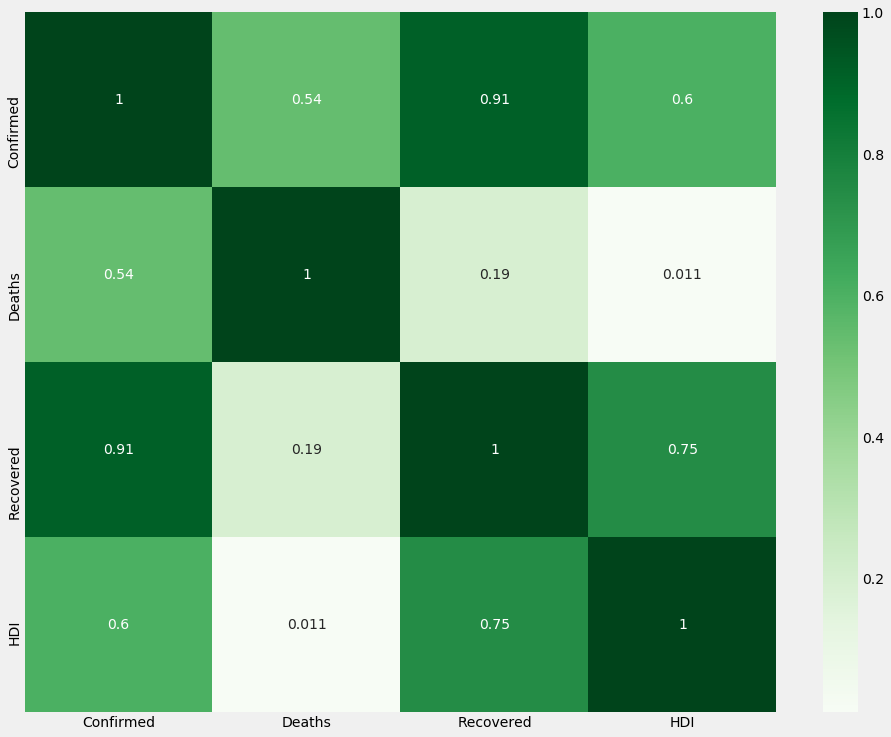

In [151]:
sns.heatmap(SEA_latest.corr(),annot = True, cmap = 'Greens' )